# League of Legends Snowball Effect

**Name(s)**: Chris Mo, Zach Thomason

**Website Link**: https://chriss-mo.github.io/League23/

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

import plotly.express as px
pd.options.plotting.backend = 'plotly'

# from dsc80_utils import * # Feel free to uncomment and use this.

## Step 1: Introduction

In [2]:
# TODO
df = pd.read_csv('2023_LoL_esports_match_data_from_OraclesElixir.csv')
complete = df[df['datacompleteness'] == 'complete']

relevant_cols = ['teamname','side','gameid','firsttothreetowers','result','league', 
                 'firstmidtower','totalgold','heralds','hextechs','date','team kpm',
                 'minionkills','firsttower', 'void_grubs','inhibitors', 'pentakills', 
                 'firstbloodassist', 'url', 'playoffs', 'champion', 'kills', 'monsterkills','dpm']

new_df = complete[relevant_cols].sort_values('firsttothreetowers')
team_df = new_df[df['playername'].isna() & df['champion'].isna()]

team_df.head()

c:\Users\chris\miniforge3\envs\dsc80\lib\site-packages\IPython\core\interactiveshell.py:3508: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\chris\AppData\Local\Temp\ipykernel_22700\460609010.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  team_df = new_df[df['playername'].isna() & df['champion'].isna()]


,teamname,side,gameid,firsttothreetowers,result,league,firstmidtower,totalgold,heralds,hextechs,...,void_grubs,inhibitors,pentakills,firstbloodassist,url,playoffs,champion,kills,monsterkills,dpm
107626,DRX,Blue,ESPORTSTMNT01_3411490,0.0,0,LCK,0.0,52574,1.0,0.0,...,NaN,0.0,0.0,NaN,NaN,1,NaN,14,192,2629.8799
51395,Estral Esports,Red,ESPORTSTMNT01_3336144,0.0,1,LLA,1.0,82474,2.0,0.0,...,NaN,1.0,0.0,NaN,NaN,1,NaN,18,286,2856.2855
102767,Vivo Keyd Stars,Red,ESPORTSTMNT01_3402856,0.0,0,CBLOL,0.0,47473,1.0,0.0,...,NaN,0.0,0.0,NaN,NaN,0,NaN,10,151,2358.1882
51407,Los Grandes Academy,Red,ESPORTSTMNT01_3336147,0.0,1,CBLOLA,0.0,75051,0.0,2.0,...,NaN,3.0,0.0,NaN,NaN,1,NaN,28,220,2252.8541
51418,Estral Esports,Blue,ESPORTSTMNT01_3337087,0.0,0,LLA,0.0,65592,0.0,1.0,...,NaN,0.0,0.0,NaN,NaN,1,NaN,6,256,1321.3856


## Step 2: Data Cleaning and Exploratory Data Analysis

In [3]:
# univariate analysis
fig = px.histogram(team_df, x = 'minionkills')
fig.show()

In [4]:
# bivariate analysis
plot_df = complete.dropna(subset=['firsttothreetowers'])
plot_df['result'] = plot_df['result'].apply(lambda x: 'win' if x == 1 else 'loss')
fig = px.pie(plot_df, names='result', values='firsttothreetowers', title='Win Percentage for Teams That Get to 3 Towers First')
fig.show()

C:\Users\chris\AppData\Local\Temp\ipykernel_22700\232165392.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [5]:
# interesting aggregates
agg_table = team_df.groupby('firsttothreetowers').mean().dropna(axis=1)
# print(agg_table.to_markdown())
agg_table

|   firsttothreetowers |   result |   firstmidtower |   totalgold |   heralds |   hextechs |   team kpm |   minionkills |   firsttower |   inhibitors |   pentakills |   playoffs |   kills |   monsterkills |     dpm |
|---------------------:|---------:|----------------:|------------:|----------:|-----------:|-----------:|--------------:|-------------:|-------------:|-------------:|-----------:|--------:|---------------:|--------:|
|                    0 | 0.209221 |        0.177204 |     53246   |  0.641708 |   0.244336 |   0.334783 |       805.233 |     0.224739 |     0.373131 |   0.00634345 |   0.231763 | 10.7876 |        166.91  | 2076.79 |
|                    1 | 0.790732 |        0.822796 |     60448.9 |  1.34285  |   0.450487 |   0.588414 |       823.284 |     0.77521  |     1.51462  |   0.0175617  |   0.231815 | 17.7854 |        191.392 | 2466.15 |


## Step 3: Assessment of Missingness

In [6]:
#Hypothesis Test
def tvd(x, y, df): #Calculate tvd
    return np.sum(np.abs(df[x] - df[y]))/2

col_1 = 'split'
col_2 = 'league'

df = complete
df_temp = df.copy() # copy of df
df_temp['missing'] = df_temp[col_1].isna() 
df_temp['not_missing'] = df_temp[col_1].notna()
grouped = df_temp.groupby(col_2).mean()

observed = tvd('missing','not_missing', grouped) #observed

tvds = [] #tvd list

#Permutation
for i in range (0,1000): #permutation loop
    df_temp[col_1] = np.random.permutation(df_temp[col_1])
    df_temp['missing'] = df_temp[col_1].isna()
    df_temp['not_missing'] = df_temp[col_1].notna()
    grouped = df_temp.groupby(col_2).mean()
    tvds.append(tvd('missing','not_missing',grouped))

# print(observed)
# print(tvds)

p_val = (observed <= np.array(tvds)).mean()
p_val

19.546692995432252
[11.824083606657812, 11.745467335768263, 11.839671181610008, 11.735065176177969, 11.818053707867739, 11.789969548604368, 11.79003732717747, 11.83258512437254, 11.811623791580516, 11.782838465139976, 11.756077696599768, 11.68757170938238, 11.742184405619826, 11.774930964602447, 11.712916311374375, 11.8043274642381, 11.788885795663404, 11.787600288663999, 11.811308500978486, 11.829644121839692, 11.795580330120675, 11.716274842454064, 11.823900047701155, 11.77467521241154, 11.729244709563085, 11.825505662207535, 11.776759699151315, 11.82851018461259, 11.685631872878421, 11.79319543744142, 11.772157152600396, 11.771073069485531, 11.828133521045553, 11.738772939504125, 11.850401772988109, 11.818222473387763, 11.813491706959669, 11.74081229314165, 11.745295516515066, 11.738143236561163, 11.799044350301736, 11.767713219821713, 11.82567276017781, 11.806361488591524, 11.734545665854302, 11.76873244078374, 11.770656517045522, 11.73558171605631, 11.752114444382046, 11.746687006

0.0

In [7]:
fig = px.histogram(tvds, title = 'Emperical Distribution of TVD')
fig.add_vline(x=observed, line_color='red')
fig.add_annotation(text=f'<span style="color:red">Observed TVD = {round(observed)}</span>',
                   x = observed - 0.65, showarrow=False, y = 100)
fig.show()

In [8]:
#Hypothesis Test For Non Dependence
col_1 = 'teamid'
col_2 = 'split'

df_temp = complete.copy() # copy of df
df_temp['missing'] = df_temp[col_1].isna() 
df_temp['not_missing'] = df_temp[col_1].notna()
grouped = df_temp.groupby(col_2).mean()

observed = tvd('missing','not_missing', grouped) #observed

tvds = [] #tvd list

#Permutation
for i in range (0,1000): #permutation loop
    df_temp[col_1] = np.random.permutation(df_temp[col_1])
    df_temp['missing'] = df_temp[col_1].isna()
    df_temp['not_missing'] = df_temp[col_1].notna()
    grouped = df_temp.groupby(col_2).mean()
    tvds.append(tvd('missing','not_missing',grouped))

# print(observed)
# print(tvds)

p_val = (observed <= np.array(tvds)).mean()
p_val

6.117328884519701
[6.332776170418897, 6.348150468479783, 6.339626276071742, 6.328316156494884, 6.335645949721533, 6.333225759681357, 6.341160042953961, 6.340328963673932, 6.324459390816933, 6.339696657965383, 6.331054090102588, 6.335817571031486, 6.337945890968232, 6.332123373866021, 6.327901384236426, 6.334312484735949, 6.328931394454639, 6.34601165116889, 6.356762857073578, 6.351737416587865, 6.331858787886813, 6.328463780407783, 6.344096947807394, 6.3415111845294705, 6.349581193077773, 6.343393188666374, 6.356380990864554, 6.341112671400374, 6.344275143570789, 6.3539543758106, 6.3469048039147715, 6.336855432869749, 6.343415485746053, 6.346790415284391, 6.361112691046629, 6.331515552747598, 6.336490916094384, 6.348347932797188, 6.348023259517248, 6.331563116498582, 6.337139788163546, 6.351383526845539, 6.344147323832917, 6.340814767889136, 6.341474677809917, 6.331974432544649, 6.335001127415027, 6.347212153962957, 6.336178095418344, 6.351806720280327, 6.335551332627478, 6.32263921590

1.0

In [9]:
fig = px.histogram(tvds, title = 'Emperical Distribution of TVD')
fig.add_vline(x=observed, line_color='red')
fig.add_annotation(text=f'<span style="color:red">Observed TVD = {round(observed)}</span>',
                   x = observed + 0.02, showarrow=False, y = 80)
fig.show()

## Step 4: Hypothesis Testing

In [10]:
td = team_df.copy()


test = td[['firsttothreetowers','result']]
    
vals = (test.groupby('firsttothreetowers').mean())['result']
observed = (vals.iloc[0] - vals.iloc[1])
stat_list = []

for i in range(0,1000):
    test['result'] = np.random.permutation(test['result'])

    num = (test.groupby('firsttothreetowers').mean())['result']
    test_stat = (num.iloc[0] - num.iloc[1])

    stat_list.append(test_stat)

# print(stat_list)
(observed >= stat_list).mean()


C:\Users\chris\AppData\Local\Temp\ipykernel_22700\1449870594.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[0.005551162786638475, 0.008043515826443137, 0.011442179062540303, 0.0007930342561023318, 0.005551162786638475, 0.00351196484498012, -0.007363757510531088, -0.00872322280497001, -0.00033985348926351966, -0.00011327594019028275, 0.003738542394053246, 0.008723248473662515, 0.004871430139418986, 0.000339879157955969, -0.004418249372580174, -0.005324559568872733, 0.015067419847710706, 0.013028221906052406, -0.0014727412346292046, 0.0028322321977606313, 0.0073637831792236486, -0.0007930085874098269, 0.0012461893542485836, -0.0057777146670190405, -0.019598945160481163, 0.00668405053200416, -0.004871404470726426, 0.0005664567070290949, -0.0014727412346292046, 0.0021524995505412536, -0.005551137117945915, -0.003285361627214378, 0.0023790770996143795, 0.01484084229863758, -0.005551137117945915, 0.0028322321977606313, 0.003738542394053246, 0.003058809746833757, -0.012348463590140357, -0.00373851672536063, 0.012348489258832918, 0.005777740335711601, 0.0014727669033217095, 0.010989023964394051, 0.

0.0

In [11]:
import plotly.io as pio

fig = px.histogram(stat_list, nbins=30, labels={'value': 'Difference in Means'}, title='Permutation Test Distribution')
fig.add_vline(x=observed, line_width=2, line_dash="dash", line_color="red", 
              annotation_text=f'Observed Statistic: {observed:.2f}', annotation_position="top left")
pio.write_html(fig, file='permutation_test_distribution.html', auto_open=True)

## Step 5: Framing a Prediction Problem

## Step 6: Baseline Model

In [12]:
# TODO
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = (
    train_test_split(team_df[['kills', 'minionkills','monsterkills','dpm']], 
                     team_df['firsttothreetowers'], test_size=0.25)
)

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

baseline = Pipeline([ 
    ('clf',DecisionTreeClassifier()) 
])

baseline.fit(X_train, y_train)

Pipeline(steps=[('clf', DecisionTreeClassifier())])

In [14]:
print('training acc: ', baseline.score(X_train, y_train))
print('testing acc: ', baseline.score(X_test, y_test))

training acc:  1.0
testing acc:  0.670140462165836


## Step 7: Final Model

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

team = team_df.fillna(0) # fill null 'firstmidtower' values, explained in the readme.
X_train, X_test, y_train, y_test = (
    train_test_split(team[['kills', 'minionkills','monsterkills','dpm', 
                           'firsttower', 'firstmidtower','totalgold']], 
                     team['firsttothreetowers'], test_size=0.25)
)

final_model = Pipeline([ 
    ('scale', StandardScaler()),
    ('final', RandomForestClassifier(
        max_depth=3,
        n_estimators=100, # Uses 100 separate decision trees!
    ))
])
# fina

hyperparameters = {
    'final__max_depth': np.arange(1, 30, 1),
    'final__n_estimators' : np.arange(2,25,1),
}

grids = GridSearchCV(
    final_model,
    n_jobs=-1, # Use multiple processors to parallelize
    param_grid=hyperparameters,
    return_train_score=True
)

grids.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('final',
                                        RandomForestClassifier(max_depth=3))]),
             n_jobs=-1,
             param_grid={'final__max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'final__n_estimators': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24])},
             return_train_score=True)

In [16]:
print('training accuracy: ', grids.score(X_train, y_train))
print('testing accuracy: ', grids.score(X_test, y_test))

training accuracy:  0.8589123867069487
testing accuracy:  0.843679202537381


In [17]:
grids.best_params_

{'final__max_depth': 7, 'final__n_estimators': 14}

<AxesSubplot:>

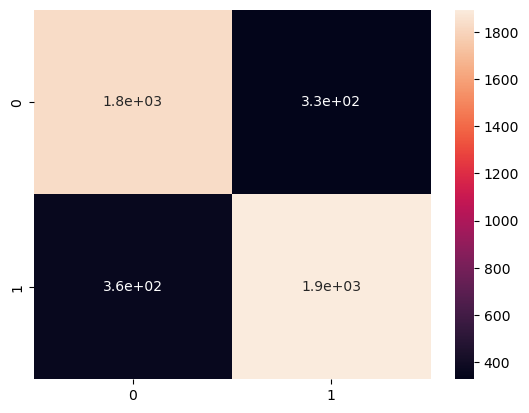

In [18]:
from sklearn.metrics import confusion_matrix
from seaborn import heatmap

ypred = grids.predict(X_test)
heatmap(confusion_matrix(y_test, ypred), annot=True)

## Step 8: Fairness Analysis

In [19]:
from sklearn.preprocessing import Binarizer
from sklearn.compose import ColumnTransformer

final_cols = ['kills', 'minionkills','monsterkills','dpm', 
              'firsttower', 'firstmidtower','totalgold', 'firsttothreetowers']
fair = team_df[final_cols].fillna(0)

X = fair.drop(columns = 'firsttothreetowers')
y = fair['firsttothreetowers']
X_train, X_test, y_train, y_test = (train_test_split(X,y, test_size=0.25))
results = X_test.copy()
y_pred = grids.predict(X_test)
results['tag'] = y_test
results['ypred'] = y_pred
results['lt_25'] = results['kills'] < 25
results

,kills,minionkills,monsterkills,dpm,firsttower,firstmidtower,totalgold,tag,ypred,lt_25
84923,20,898.0,211,2901.5540,1.0,1.0,66942,1.0,1.0,True
4726,10,508.0,111,2145.4304,0.0,0.0,37511,0.0,0.0,True
115042,7,757.0,128,1216.0985,0.0,0.0,43464,0.0,0.0,True
117263,19,787.0,251,2304.1368,1.0,1.0,62259,1.0,1.0,True
52571,6,862.0,153,1692.7224,0.0,0.0,49443,0.0,0.0,True
...,...,...,...,...,...,...,...,...,...,...
6970,13,743.0,169,2656.5770,1.0,1.0,52627,1.0,1.0,True
15215,13,855.0,164,1802.6637,1.0,1.0,56519,1.0,1.0,True
98206,19,744.0,129,2081.3700,0.0,1.0,51921,1.0,1.0,True
26003,10,743.0,211,1771.2734,1.0,0.0,52692,0.0,0.0,True


In [20]:
from sklearn.metrics import accuracy_score
compute_accuracy = lambda x: accuracy_score(x['tag'], x['ypred'])
obs = results.groupby('lt_25').apply(compute_accuracy).diff().iloc[-1]
diffs = []
for i in range(1000):
    diffs.append(results[['lt_25','ypred','tag']].assign(lt_25 = np.random.permutation(results['lt_25']))
                 .groupby('lt_25').apply(compute_accuracy).diff().iloc[-1])

In [21]:
(obs <= diffs).mean()

0.079

In [22]:
fig = px.histogram(diffs, title='Fairness Analysis on Team Kills')
fig.add_vline(x=obs, line_color = 'red')
fig.show()